## Load agent and show rout

In [147]:
%reload_ext autoreload
%autoreload 2
import dpu_clf
import gym

seed = 1343
env_kwargs = {
    "render_mode": "rgb_array",
    "num_levels": 0,
    "start_level": 0,
    "distribution_mode": "easy",
    "rand_seed": seed,
    "use_discrete_action_wrapper": True, 
    "use_stay_bonus_wrapper": False,
    'food_diversity': 4,
    'fruitbot_num_walls': 5,
    'fruitbot_num_good_min': 5,
    'fruitbot_num_good_range': 1,
    'fruitbot_num_bad_min': 5,
    'fruitbot_num_bad_range': 1,
    'fruitbot_wall_gap_pct': 50,
    'fruitbot_door_prob_pct': 0,
    }


env = gym.make("procgen:procgen-fruitbot-v0", **env_kwargs)
# obs, _ = env.reset()
model_path = "models\\fruitbot\\20251214-084655_easy\\ppo_final.zip"
model_path2 = "models\\fruitbot\\20251213-212435_easy\\ppo_final.zip"
agent = dpu_clf.load_agent(None, model_path2)
frames_jupms = 5
frames, frames_indexes, collect_indexes, wall_collision_index = dpu_clf.record_frames(env, agent, frames_jumps=frames_jupms)

starting make_env with env_name: fruitbot
Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
ExtractDictObWrapper applied
Successfully loaded model from models\fruitbot\20251213-212435_easy\ppo_final.zip


In [148]:
print(f"len(frames)={len(frames)}")
print(f"frames_indexes={frames_indexes}")
print(f"collect_indexes={collect_indexes}")
print(f"wall_collision_index={wall_collision_index}")

len(frames)=34
frames_indexes=[0, 1, 5, 7, 9, 10, 15, 17, 20, 25, 28, 30, 35, 40, 43, 45, 50, 54, 55, 60, 63, 65, 70, 75, 80, 82, 84, 85, 90, 91, 92, 93, 94, 95]
collect_indexes=[28, 54, 84]
wall_collision_index=-1


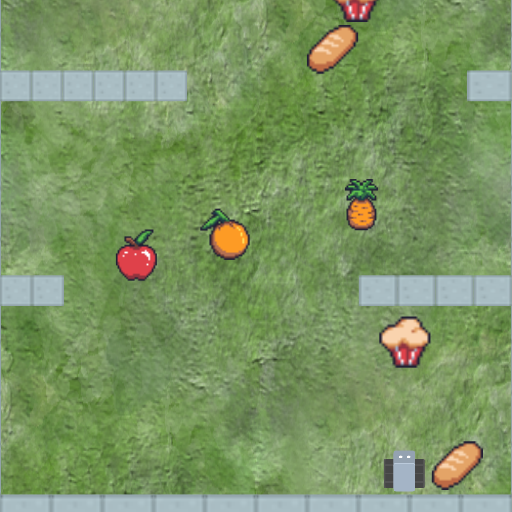

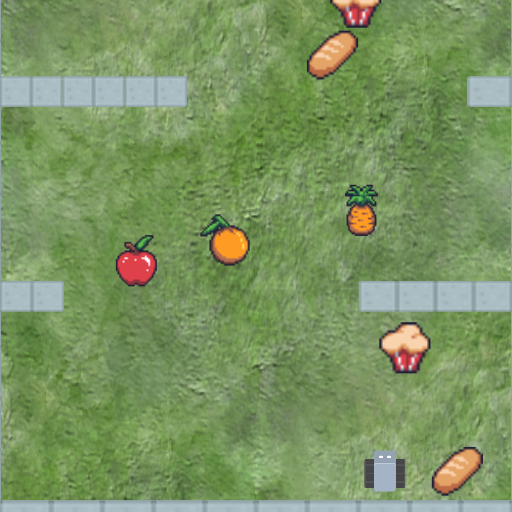

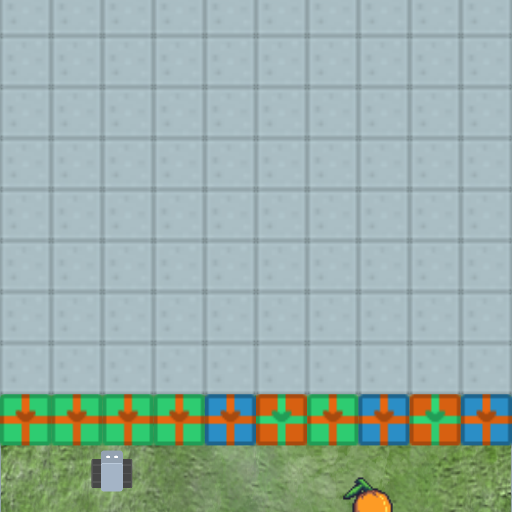

In [149]:
from IPython.display import display

# for i, frame in enumerate(frames):
#     if i % 10 == 0:
#         print(f"Frame {i}:")
#         display(frame)
display(frames[0])
display(frames[1])  
display(frames[-1])


In [143]:
result_path, last_frame = dpu_clf.record_bot_path_on_image(frames[0], frames, frames_indexes, collect_indexes, wall_collision_index)

Reached end of frames_indexes while drawing path.
i=33, len(frames_indexes)=34


In [144]:
import dpu_clf
len(frames)
full_path, clean_image = dpu_clf.draw_full_path(frames, frames_indexes=frames_indexes, collect_indexes=collect_indexes, frames_jumps=frames_jupms, wall_collision_index=wall_collision_index)


using frames list with 34 frames
base_frames length: 2
Reached end of frames_indexes while drawing path.
i=33, len(frames_indexes)=34


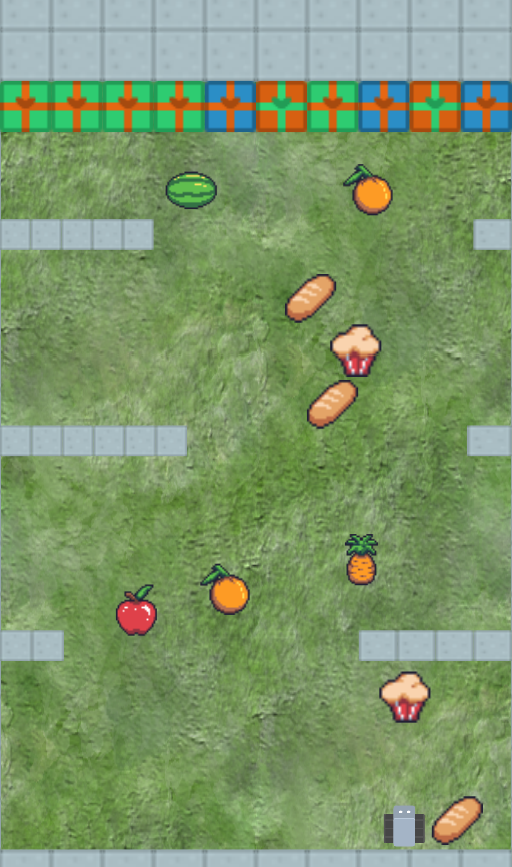

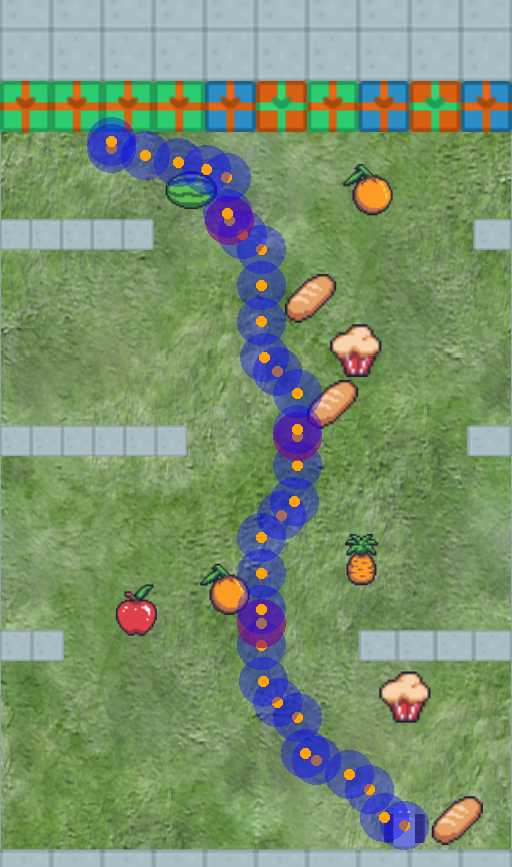

In [146]:
from IPython.display import display
display(clean_image)
display(full_path)
